# Linear Regression From Scratch.

This is a notebook which will implement the linear regression model from scratch to predict the salary of a person given his\her years of experience. the linear regression model uses batch gradient descent to optimize the loss of the predictions and mean squared error as the loss function.

In [2]:
from linear_regression import Linear_Regressor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

The dataset we are going to work with has two columns the years of expirence and the salaries. 

In [3]:
dataset = pd.read_csv("Salary_Data.csv")
dataset.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Seperating the Independent variable x from the dependent variable y, in our case <b>Years of Experience</b> is the independent variable while the <b>Salary</b> is the dependent variable because it is what we want to predict.
We will also make them numpy arrays for the machine learning model to work with.

In [30]:
X = np.array(dataset.iloc[:,0:1])
y = np.array(dataset.iloc[:,1])
print(X[:5],y[:5])

[[1.1]
 [1.3]
 [1.5]
 [2. ]
 [2.2]] [39343. 46205. 37731. 43525. 39891.]


## Spliting the Data !

The next step is to split the data to training and testing data for the machine learning model to train and predict. 

In [31]:
def split_data(X,y,ratio=0.25):
    assert len(X) == len(y)
    n = len(X)
    index = int(n * (1 - ratio))
    X_train = X[:index]
    y_train = y[:index]
    X_test = X[index:]
    y_test = y[index:]
    
    return X_train,y_train,X_test,y_test

In [32]:
X_train, y_train, X_test, y_test = split_data(X,y,0.30)

To train the model we use the linear regression model imported earlier in the note and the the training dataset.

In [33]:
model = Linear_Regressor()

In [40]:
model.train(X_train,y_train,epochs=2000,alpha=0.00001,verbose=1)

Epoch: 0 val loss ========================> [1.97362798e+09]
Epoch: 1 val loss ========================> [1.94821846e+09]
Epoch: 2 val loss ========================> [1.92316079e+09]
Epoch: 3 val loss ========================> [1.89844999e+09]
Epoch: 4 val loss ========================> [1.87408116e+09]
Epoch: 5 val loss ========================> [1.85004947e+09]
Epoch: 6 val loss ========================> [1.82635014e+09]
Epoch: 7 val loss ========================> [1.80297848e+09]
Epoch: 8 val loss ========================> [1.77992986e+09]
Epoch: 9 val loss ========================> [1.7571997e+09]
Epoch: 10 val loss ========================> [1.73478351e+09]
Epoch: 11 val loss ========================> [1.71267686e+09]
Epoch: 12 val loss ========================> [1.69087537e+09]
Epoch: 13 val loss ========================> [1.66937473e+09]
Epoch: 14 val loss ========================> [1.6481707e+09]
Epoch: 15 val loss ========================> [1.62725908e+09]
Epoch: 16 val loss =

Epoch: 315 val loss ========================> [1.123062e+08]
Epoch: 316 val loss ========================> [1.11841382e+08]
Epoch: 317 val loss ========================> [1.11381562e+08]
Epoch: 318 val loss ========================> [1.10926679e+08]
Epoch: 319 val loss ========================> [1.10476673e+08]
Epoch: 320 val loss ========================> [1.10031485e+08]
Epoch: 321 val loss ========================> [1.09591056e+08]
Epoch: 322 val loss ========================> [1.0915533e+08]
Epoch: 323 val loss ========================> [1.08724248e+08]
Epoch: 324 val loss ========================> [1.08297754e+08]
Epoch: 325 val loss ========================> [1.07875793e+08]
Epoch: 326 val loss ========================> [1.07458311e+08]
Epoch: 327 val loss ========================> [1.07045253e+08]
Epoch: 328 val loss ========================> [1.06636566e+08]
Epoch: 329 val loss ========================> [1.06232196e+08]
Epoch: 330 val loss ========================> [1.05832094e

Epoch: 585 val loss ========================> [67654607.97258256]
Epoch: 586 val loss ========================> [67609416.89737214]
Epoch: 587 val loss ========================> [67564516.53599569]
Epoch: 588 val loss ========================> [67519904.31302421]
Epoch: 589 val loss ========================> [67475577.67867249]
Epoch: 590 val loss ========================> [67431534.10851233]
Epoch: 591 val loss ========================> [67387771.10318936]
Epoch: 592 val loss ========================> [67344286.1881434]
Epoch: 593 val loss ========================> [67301076.91333213]
Epoch: 594 val loss ========================> [67258140.85295844]
Epoch: 595 val loss ========================> [67215475.60520084]
Epoch: 596 val loss ========================> [67173078.79194725]
Epoch: 597 val loss ========================> [67130948.05853222]
Epoch: 598 val loss ========================> [67089081.07347696]
Epoch: 599 val loss ========================> [67047475.52823335]
Epoch: 600 

Epoch: 857 val loss ========================> [61065966.45753789]
Epoch: 858 val loss ========================> [61052226.25344966]
Epoch: 859 val loss ========================> [61038519.98105109]
Epoch: 860 val loss ========================> [61024847.39973816]
Epoch: 861 val loss ========================> [61011208.27078371]
Epoch: 862 val loss ========================> [60997602.35732152]
Epoch: 863 val loss ========================> [60984029.42433128]
Epoch: 864 val loss ========================> [60970489.23862322]
Epoch: 865 val loss ========================> [60956981.56882293]
Epoch: 866 val loss ========================> [60943506.18535651]
Epoch: 867 val loss ========================> [60930062.86043559]
Epoch: 868 val loss ========================> [60916651.36804266]
Epoch: 869 val loss ========================> [60903271.4839165]
Epoch: 870 val loss ========================> [60889922.98553777]
Epoch: 871 val loss ========================> [60876605.65211469]
Epoch: 872 

Epoch: 1164 val loss ========================> [57740131.64390972]
Epoch: 1165 val loss ========================> [57730867.41299228]
Epoch: 1166 val loss ========================> [57721608.46125969]
Epoch: 1167 val loss ========================> [57712354.76451296]
Epoch: 1168 val loss ========================> [57703106.29872815]
Epoch: 1169 val loss ========================> [57693863.04005516]
Epoch: 1170 val loss ========================> [57684624.9648165]
Epoch: 1171 val loss ========================> [57675392.04950593]
Epoch: 1172 val loss ========================> [57666164.2707872]
Epoch: 1173 val loss ========================> [57656941.60549289]
Epoch: 1174 val loss ========================> [57647724.03062305]
Epoch: 1175 val loss ========================> [57638511.52334405]
Epoch: 1176 val loss ========================> [57629304.06098725]
Epoch: 1177 val loss ========================> [57620101.62104793]
Epoch: 1178 val loss ========================> [57610904.1811840

Epoch: 1527 val loss ========================> [54612353.65665939]
Epoch: 1528 val loss ========================> [54604215.48119562]
Epoch: 1529 val loss ========================> [54596079.43494672]
Epoch: 1530 val loss ========================> [54587945.51595109]
Epoch: 1531 val loss ========================> [54579813.72225933]
Epoch: 1532 val loss ========================> [54571684.05193431]
Epoch: 1533 val loss ========================> [54563556.50305084]
Epoch: 1534 val loss ========================> [54555431.07369586]
Epoch: 1535 val loss ========================> [54547307.76196816]
Epoch: 1536 val loss ========================> [54539186.56597838]
Epoch: 1537 val loss ========================> [54531067.48384894]
Epoch: 1538 val loss ========================> [54522950.51371377]
Epoch: 1539 val loss ========================> [54514835.65371849]
Epoch: 1540 val loss ========================> [54506722.90202028]
Epoch: 1541 val loss ========================> [54498612.25678

Epoch: 1839 val loss ========================> [52169932.47380713]
Epoch: 1840 val loss ========================> [52162401.60433524]
Epoch: 1841 val loss ========================> [52154872.57101291]
Epoch: 1842 val loss ========================> [52147345.37339943]
Epoch: 1843 val loss ========================> [52139820.01105539]
Epoch: 1844 val loss ========================> [52132296.48354275]
Epoch: 1845 val loss ========================> [52124774.7904246]
Epoch: 1846 val loss ========================> [52117254.93126534]
Epoch: 1847 val loss ========================> [52109736.90563072]
Epoch: 1848 val loss ========================> [52102220.71308757]
Epoch: 1849 val loss ========================> [52094706.35320416]
Epoch: 1850 val loss ========================> [52087193.82554984]
Epoch: 1851 val loss ========================> [52079683.1296952]
Epoch: 1852 val loss ========================> [52072174.26521212]
Epoch: 1853 val loss ========================> [52064667.2316735

In [41]:
y_pred = model.predict(X_test)

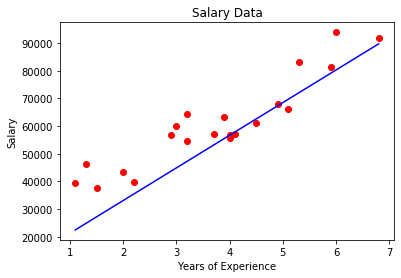

In [42]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,model.predict(X_train),color='blue')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary Data")
plt.show()

## Using $R^2$ as the metric for accuracy measurement.

In [11]:
def r_squared(y_true,y_pred):
    y_avg = np.sum(y_true) / len(y_true)
    res_error = np.sum((y_true - y_pred)**2)
    total_error  = np.sum((y_true - y_avg)**2)
    
    result = 1 - res_error / total_error
    return result

In [12]:
loss = r_squared(y_train,model.predict(X_train))
print(loss)

0.5796118058226201


## Using Sklearn to compare the performance of it.

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [43]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

y_pred2 = regressor.predict(X_test)